<a href="https://colab.research.google.com/github/Akter-Ashik/basic-python/blob/main/Highpass%20Filtering%20In%20Papaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn
!pip install opencv-python
!pip install albumentations


In [34]:
# Import libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from albumentations import (
    Compose, HorizontalFlip, Rotate, RandomBrightnessContrast,
    HueSaturationValue, Resize, RandomResizedCrop
)


In [35]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [44]:
# Function to apply high-pass filter with resizing
def apply_high_pass_filter(image):
    if len(image.shape) == 3:  # Check if the image is RGB
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image

    # Use cv2.CV_32F instead of cv2.CV_64F for Laplacian
    laplacian = cv2.Laplacian(gray, cv2.CV_32F)

    # Resize Laplacian to match the original image size
    laplacian_resized = cv2.resize(laplacian, (image.shape[1], image.shape[0]))

    return laplacian_resized


In [45]:
# Function to preprocess images with resizing
def preprocess_image(image_path, target_size=(224, 224), apply_high_pass=True):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Apply high-pass filter if specified
    if apply_high_pass:
        image = apply_high_pass_filter(image)  # Remove 'alpha' parameter here

    return image / 255.0  # Normalize to [0, 1]


In [46]:
# Path to the folder containing papaya images
data_folder = '/content/drive/MyDrive/Papaya - Dataset/Highpass'

In [47]:
# Load and preprocess images
image_files = os.listdir(data_folder)
images = [preprocess_image(os.path.join(data_folder, file)) for file in image_files]


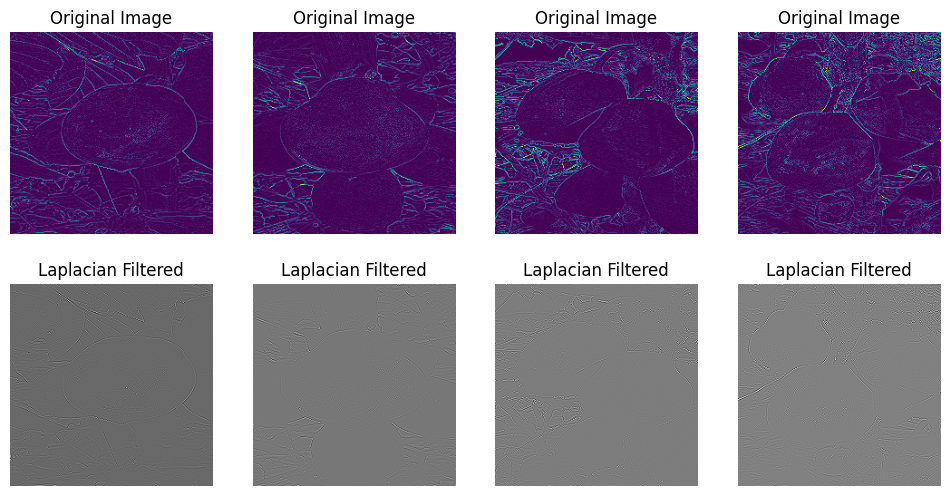

In [48]:
# Display the original and Laplacian-filtered images
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(np.clip(images[i], 0, 1))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 4, i+5)
    laplacian_image = apply_high_pass_filter(images[i])
    plt.imshow(laplacian_image, cmap='gray')  # Use 'gray' colormap for single-channel images
    plt.title('Laplacian Filtered')
    plt.axis('off')

plt.show()

Image 1 - Original Mean: 0.0411, Original Std: 0.0895 | High-Pass Mean: 0.0003, High-Pass Std: 0.6593
Image 2 - Original Mean: 0.0423, Original Std: 0.0924 | High-Pass Mean: 0.0001, High-Pass Std: 0.6194
Image 3 - Original Mean: 0.0602, Original Std: 0.1400 | High-Pass Mean: -0.0000, High-Pass Std: 1.1211
Image 4 - Original Mean: 0.0687, Original Std: 0.1425 | High-Pass Mean: 0.0001, High-Pass Std: 1.1919


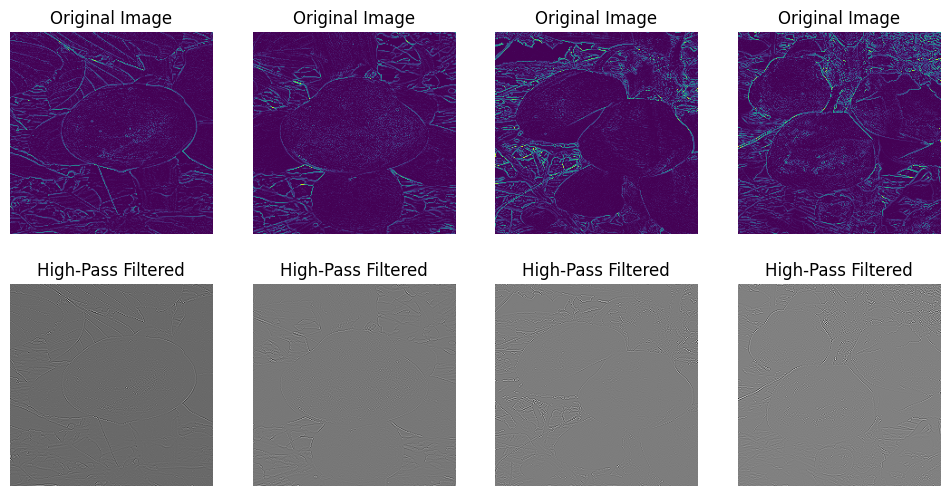

In [49]:
# Display the original and high-pass filtered images with statistics
plt.figure(figsize=(12, 6))
for i in range(4):
    # Original Image
    original_image = np.clip(images[i], 0, 1)
    plt.subplot(2, 4, i+1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # High-Pass Filtered Image
    high_pass_image = apply_high_pass_filter(images[i])
    plt.subplot(2, 4, i+5)
    plt.imshow(high_pass_image, cmap='gray')
    plt.title('High-Pass Filtered')
    plt.axis('off')

    # Display statistics
    original_mean = np.mean(original_image)
    original_std = np.std(original_image)

    high_pass_mean = np.mean(high_pass_image)
    high_pass_std = np.std(high_pass_image)

    print(f"Image {i+1} - Original Mean: {original_mean:.4f}, Original Std: {original_std:.4f} | "
          f"High-Pass Mean: {high_pass_mean:.4f}, High-Pass Std: {high_pass_std:.4f}")

plt.show()
